In [144]:
from __future__ import print_function, division
#virtualenv -p python3 venv

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import cPickle as pk
import pandas as pd
import numpy as np
from IPython.display import clear_output

In [159]:
import os
import sys
base_module_path = os.path.abspath(os.path.join('..'))
if base_module_path not in sys.path:
    sys.path.append(base_module_path)
import cervix as c

In [147]:
ls ../data/train/

Type_1/ Type_2/ Type_3/


In [148]:
df = c.data.make_base_df()
df = c.processing.transform_save_imgs(df, c.processing.resize_100);
df = c.processing.random_forest_transform(df, 'resize_100_path', grayscale=False)

In [149]:
train, validate, test = c.data.split_df(df); 

In [150]:
print(train.shape)
train.head()

(888, 6)


,path,Type,filetype,num_id,resize_100_path,vec
137,../data/train/Type_1/441.jpg,1,jpg,441,../data/processed/resize_100/train/441.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
130,../data/train/Type_1/396.jpg,1,jpg,396,../data/processed/resize_100/train/396.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1032,../data/train/Type_3/1003.jpg,3,jpg,1003,../data/processed/resize_100/train/1003.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
177,../data/train/Type_1/623.jpg,1,jpg,623,../data/processed/resize_100/train/623.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1303,../data/train/Type_3/480.jpg,3,jpg,480,../data/processed/resize_100/train/480.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [151]:
print(validate.shape)
validate.head()

(296, 6)


,path,Type,filetype,num_id,resize_100_path,vec
1126,../data/train/Type_3/1300.jpg,3,jpg,1300,../data/processed/resize_100/train/1300.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1446,../data/train/Type_3/897.jpg,3,jpg,897,../data/processed/resize_100/train/897.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
588,../data/train/Type_2/225.jpg,2,jpg,225,../data/processed/resize_100/train/225.jpg,"[[0.00916428998714, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
907,../data/train/Type_2/785.jpg,2,jpg,785,../data/processed/resize_100/train/785.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
674,../data/train/Type_2/381.jpg,2,jpg,381,../data/processed/resize_100/train/381.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [152]:
print(test.shape)
test.head()

(297, 6)


,path,Type,filetype,num_id,resize_100_path,vec
1067,../data/train/Type_3/1107.jpg,3,jpg,1107,../data/processed/resize_100/train/1107.jpg,"[[0.00868515096737, 0.00868515096737, 0.008685..."
1305,../data/train/Type_3/49.jpg,3,jpg,49,../data/processed/resize_100/train/49.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
328,../data/train/Type_2/1138.jpg,2,jpg,1138,../data/processed/resize_100/train/1138.jpg,"[[0.0, 0.0, 0.00683107281201, 0.0, 0.0, 0.0068..."
704,../data/train/Type_2/428.jpg,2,jpg,428,../data/processed/resize_100/train/428.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
191,../data/train/Type_1/7.jpg,1,jpg,7,../data/processed/resize_100/train/7.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


# Model creation

In [153]:
X_train = np.squeeze(np.array(train['vec'].tolist()))
y_train = train['Type'].as_matrix()

from sklearn.ensemble import RandomForestClassifier as RFC
rfc = RFC(n_jobs=2,n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=2, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [154]:
X_test = np.squeeze(np.array(test['vec'].tolist()))
y_test = test['Type'].as_matrix()
pred_probs = rfc.predict_proba(X_test)

In [155]:
test = c.processing.append_probabilities(test, pred_probs, rfc.classes_); test.head()

,path,Type,filetype,num_id,resize_100_path,vec,Type_1,Type_2,Type_3
1067,../data/train/Type_3/1107.jpg,3,jpg,1107,../data/processed/resize_100/train/1107.jpg,"[[0.00868515096737, 0.00868515096737, 0.008685...",0.06,0.54,0.40
1305,../data/train/Type_3/49.jpg,3,jpg,49,../data/processed/resize_100/train/49.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.20,0.30,0.50
328,../data/train/Type_2/1138.jpg,2,jpg,1138,../data/processed/resize_100/train/1138.jpg,"[[0.0, 0.0, 0.00683107281201, 0.0, 0.0, 0.0068...",0.42,0.46,0.12
704,../data/train/Type_2/428.jpg,2,jpg,428,../data/processed/resize_100/train/428.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.04,0.50,0.46
191,../data/train/Type_1/7.jpg,1,jpg,7,../data/processed/resize_100/train/7.jpg,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.24,0.32,0.44


In [160]:
score, ldf = c.submission.compute_losses(test)

Use: `df.sort_values('log_l', ascending=False)` to order by log_l


In [161]:
score

0.9643194080393922

In [169]:
ldf.sort_values('log_l', ascending=False).path.iloc[0]

'../data/train/Type_3/272.jpg'

../data/train/Type_3/272.jpg
(4128, 3096, 3)


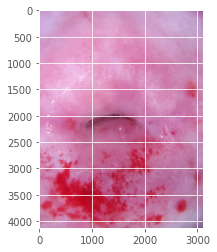

In [173]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).path.iloc[0])

../data/processed/resize_100/train/272.jpg
(100, 100, 3)


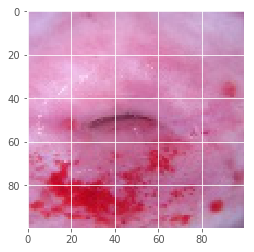

In [177]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).resize_100_path.iloc[0])

../data/train/Type_1/1288.jpg
(3264, 2448, 3)


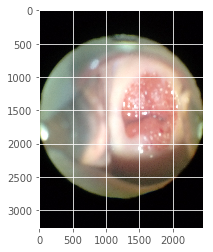

In [174]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).path.iloc[1])

../data/processed/resize_100/train/1288.jpg
(100, 100, 3)


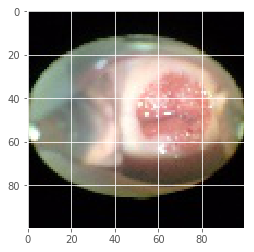

In [176]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).resize_100_path.iloc[1])

../data/train/Type_1/901.jpg
(3264, 2448, 3)


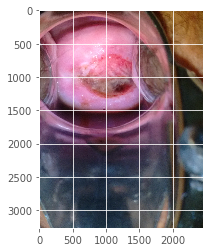

In [175]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).path.iloc[3])

../data/processed/resize_100/train/901.jpg
[[[  0   0  10]
  [  8   7  15]
  [ 21  16  23]
  ..., 
  [133  82  35]
  [118  70  22]
  [ 99  53   4]]

 [[ 17  13  14]
  [ 37  26  30]
  [101  85  88]
  ..., 
  [127  77  24]
  [128  81  27]
  [131  86  31]]

 [[ 96  79  71]
  [139 116 110]
  [152 118 116]
  ..., 
  [113  64   6]
  [121  72  14]
  [133  87  28]]

 ..., 
 [[126 102  90]
  [152 129 115]
  [158 132 119]
  ..., 
  [ 28  34  34]
  [ 21  27  27]
  [ 22  28  26]]

 [[122 104  92]
  [149 127 114]
  [149 123 110]
  ..., 
  [ 24  30  30]
  [ 20  26  24]
  [ 19  25  21]]

 [[130 117 108]
  [106  89  79]
  [114  90  78]
  ..., 
  [ 24  30  28]
  [ 19  25  21]
  [ 16  23  16]]]
(100, 100, 3)


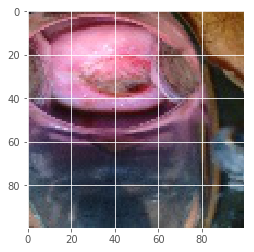

In [179]:
c.data.check_image(ldf.sort_values('log_l', ascending=False).resize_100_path.iloc[3])